In [1]:
from skimage import io, util, filters, measure
import skimage
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import math
import os
from myImageLib import dirrec, to8bit, bpass, FastPeakFind
import pdb
from IPython.display import clear_output, display
import trackpy as tp
from skimage.morphology import skeletonize
from scipy import ndimage

<IPython.core.display.Javascript object>


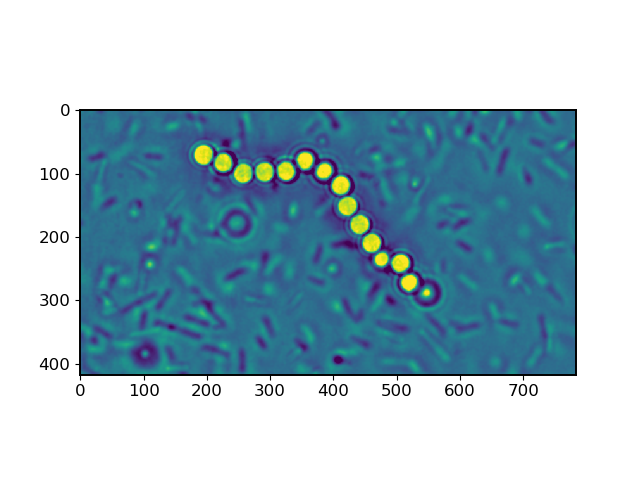

In [2]:
%matplotlib nbagg
img = io.imread(r'I:\Github\Python\Tracking\chainTracking\test_images\00000.tif')
plt.imshow(img)

<IPython.core.display.Javascript object>


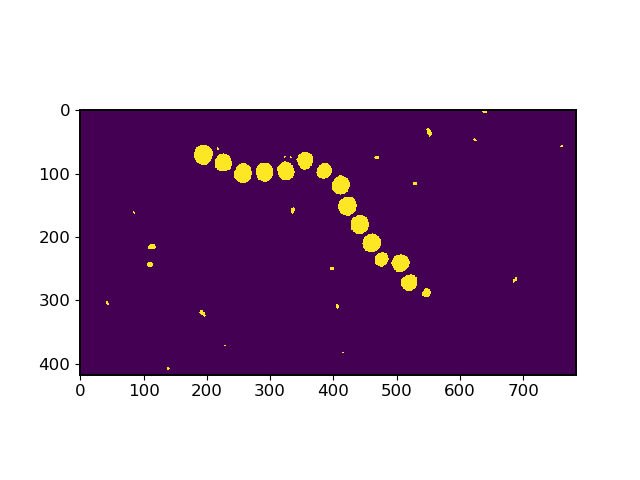

In [3]:
filt = img>filters.threshold_isodata(img)
plt.imshow(filt)

<IPython.core.display.Javascript object>


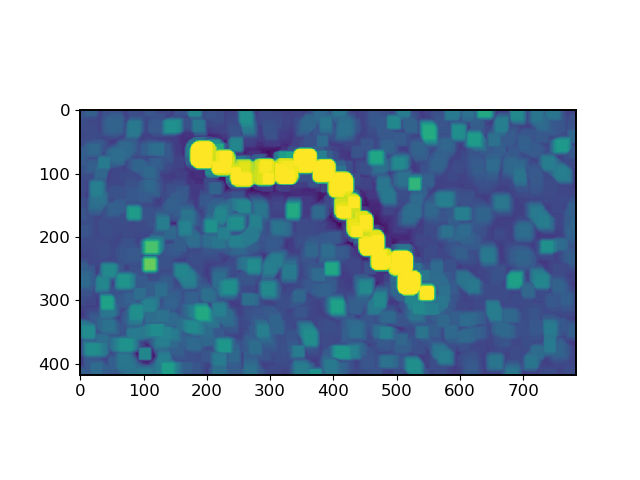

In [11]:
maxfilt = ndimage.maximum_filter(img, size=15)
plt.imshow(maxfilt)

<IPython.core.display.Javascript object>


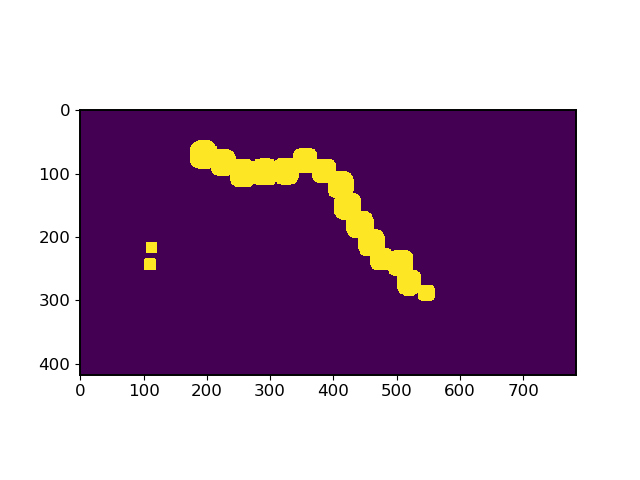

In [12]:
maxfilt_thres = maxfilt > filters.threshold_minimum(maxfilt)
plt.imshow(maxfilt_thres)

In [16]:
label_image = measure.label(maxfilt_thres, connectivity=1)
for region in measure.regionprops(label_image):
    if region.area < 10000:
        continue
    coords = region.coords
    break

In [19]:
img1 = np.zeros(img.shape)
img1[coords[:, 0], coords[:, 1]] = 1

<IPython.core.display.Javascript object>


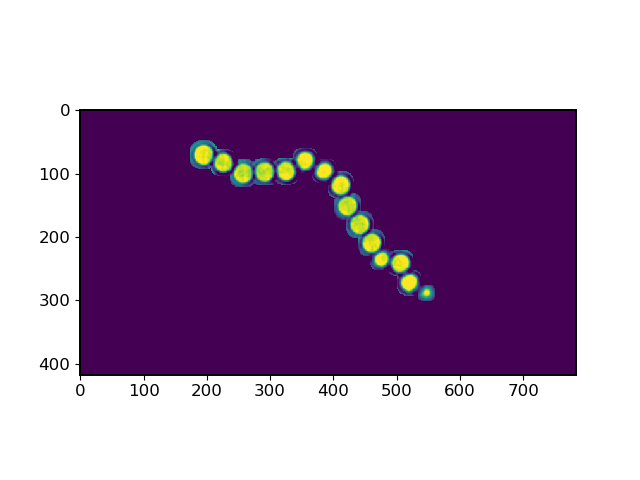

In [20]:
plt.imshow(img1)

In [4]:
def get_chain_mask(img, feature_size=10000, feature_number=1):
    maxfilt = ndimage.maximum_filter(img, size=15)
    maxfilt_thres = maxfilt > filters.threshold_minimum(maxfilt)
    label_image = measure.label(maxfilt_thres, connectivity=1)
    num = 0
    coordsL = []
    for region in measure.regionprops(label_image):
        if region.area < 10000:
            continue
        coordsL.append(region.coords)
        num += 1
        if num > feature_number:
            break
    mask = np.zeros(img.shape)
    for coords in coordsL:
        mask[coords[:, 0], coords[:, 1]] = 1
    return mask

<IPython.core.display.Javascript object>


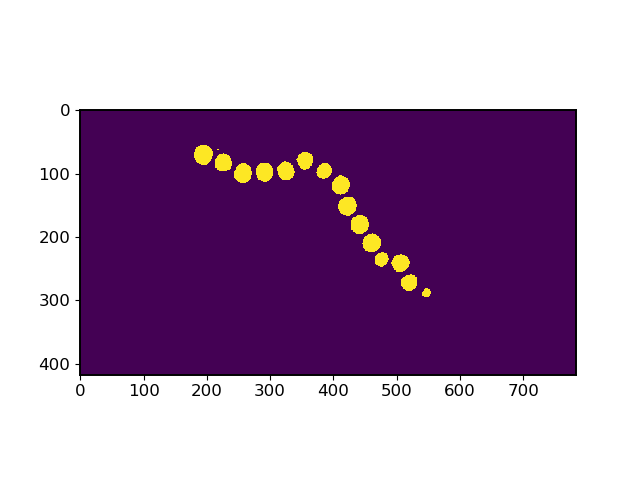

In [5]:
mask = get_chain_mask(img)
masked_filt = mask * filt
plt.imshow(masked_filt)

<IPython.core.display.Javascript object>


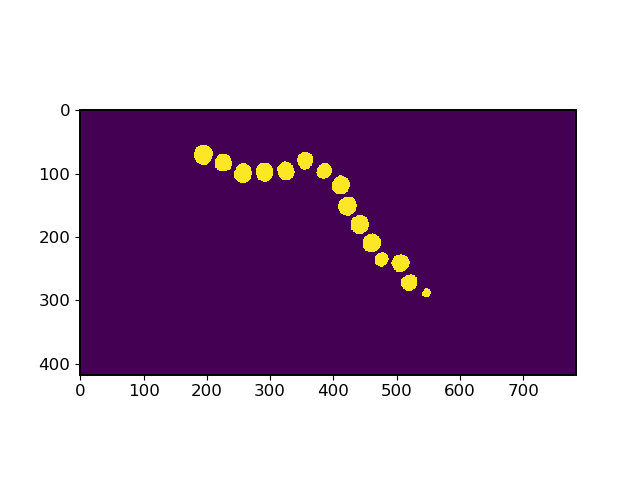

In [6]:
despeck = ndimage.median_filter(masked_filt, size=3)
plt.imshow(despeck)

<IPython.core.display.Javascript object>


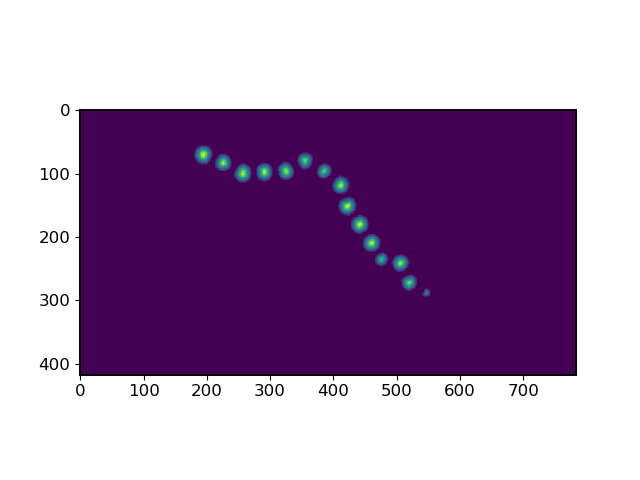

In [7]:
dt = ndimage.distance_transform_edt(despeck)
plt.imshow(dt)

In [37]:
mask = get_chain_mask(img)
isod = img > filters.threshold_isodata(img)
masked_isod = mask * isod
despeck = ndimage.median_filter(masked_isod, size=3)
dt = ndimage.distance_transform_edt(despeck)
cent = FastPeakFind(dt)

<IPython.core.display.Javascript object>


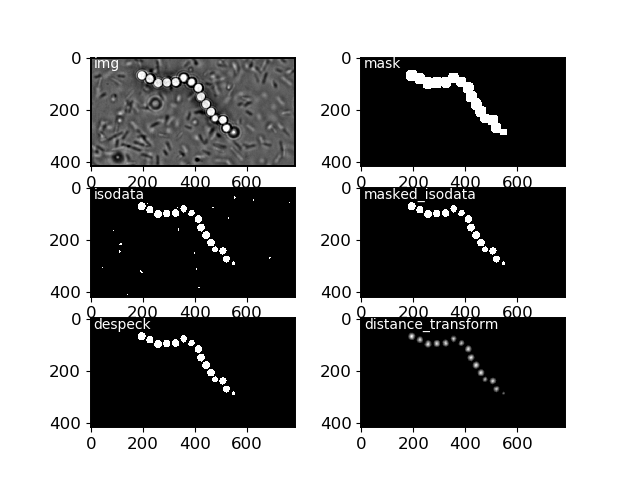

Text(10, 40, 'distance_transform')

In [38]:
fig, ax = plt.subplots(3, 2)
ax[0, 0].imshow(img, cmap='gray')
ax[0, 0].text(10, 40, 'img', c='white')
ax[0, 1].imshow(mask, cmap='gray')
ax[0, 1].text(10, 40, 'mask', c='white')
ax[1, 0].imshow(isod, cmap='gray')
ax[1, 0].text(10, 40, 'isodata', c='white')
ax[1, 1].imshow(masked_isod, cmap='gray')
ax[1, 1].text(10, 40, 'masked_isodata', c='white')
ax[2, 0].imshow(despeck, cmap='gray')
ax[2, 0].text(10, 40, 'despeck', c='white')
ax[2, 1].imshow(dt, cmap='gray')
ax[2, 1].text(10, 40, 'distance_transform', c='white')

<IPython.core.display.Javascript object>


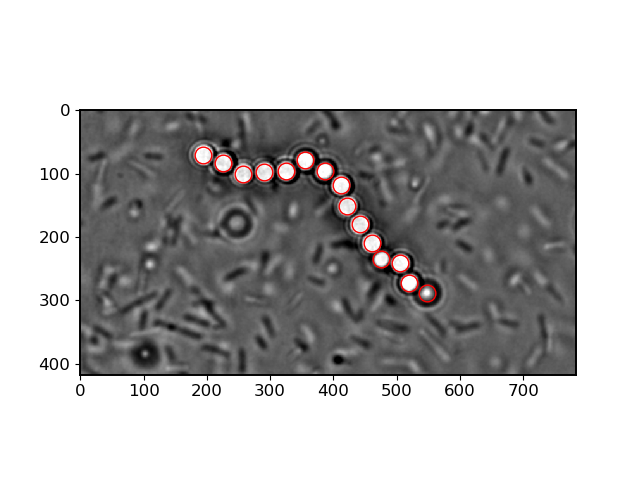

In [39]:
plt.imshow(img, cmap='gray')
plt.plot(cent[1, :], cent[0, :], marker='o', markersize=12, ls='', mec='red', mfc=(0,0,0,0))